In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1

In [ ]:
data = pd.read_csv("http://bit.ly/kaggletrain")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


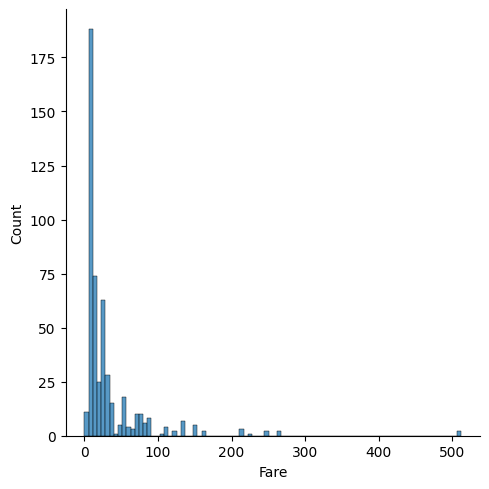

In [ ]:
sns.displot(data["Fare"].sample(500))

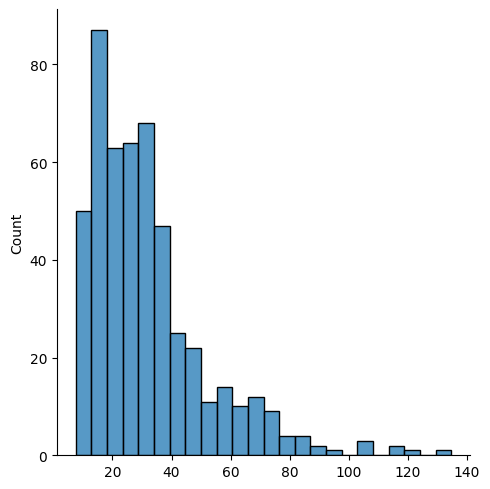

In [ ]:
means = []
for i in range(500):
  res = data["Fare"].sample(5).mean()
  means.append(res)
sns.displot(means)

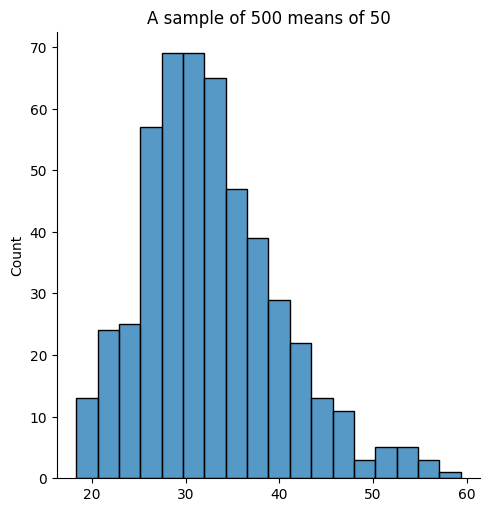

In [ ]:
means = []
for i in range(500):
  res = data["Fare"].sample(50).mean()
  means.append(res)

sns.displot(means)
plt.title("A sample of 500 means of 50")
plt.show()

# Q2

In [ ]:
df = pd.read_csv("http://bit.ly/imdbratings")
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


<Axes: xlabel='genre'>

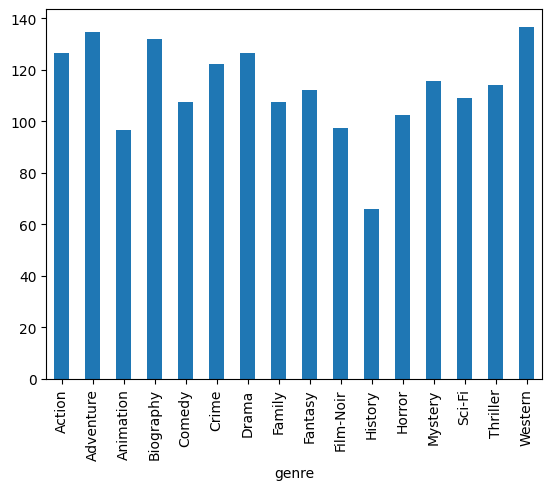

In [ ]:
df.groupby("genre")["duration"].mean().plot(kind="bar")

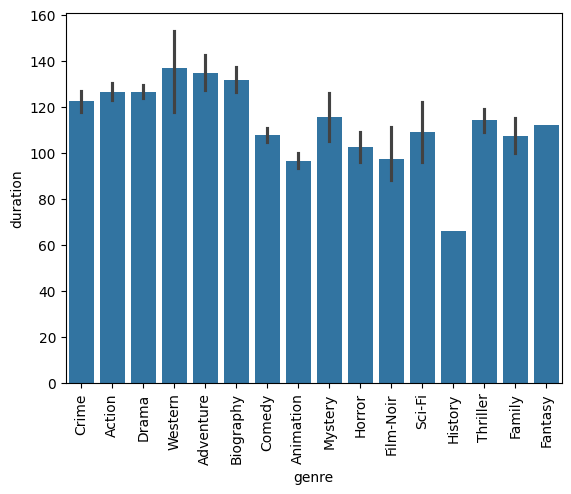

In [ ]:
sns.barplot(x="genre", y="duration", data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
temp = df[df["genre"].isin(["Western", "Mystery"])]
temp.head()

,star_rating,title,content_rating,genre,duration,actors_list
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
26,8.6,Once Upon a Time in the West,PG-13,Western,175,"[u'Henry Fonda', u'Charles Bronson', u'Claudia..."
38,8.6,Rear Window,APPROVED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
46,8.5,Memento,R,Mystery,113,"[u'Guy Pearce', u'Carrie-Anne Moss', u'Joe Pan..."
59,8.5,Django Unchained,R,Western,165,"[u'Jamie Foxx', u'Christoph Waltz', u'Leonardo..."


<Axes: xlabel='genre', ylabel='duration'>

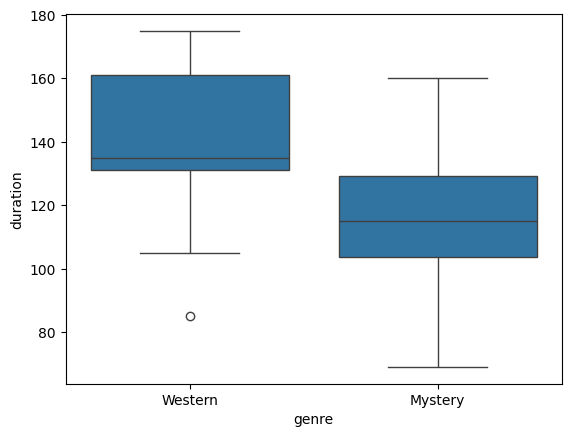

In [ ]:
sns.boxplot(x="genre", y="duration", data=temp)

In [ ]:
m1 = temp[temp["genre"] == "Western"]["duration"].mean()
m2 = temp[temp["genre"] == "Mystery"]["duration"].mean()
org_diff = m1 - m2
org_diff

21.041666666666657

In [ ]:
temp[temp["genre"] == "Mystery"].shape

(16, 6)

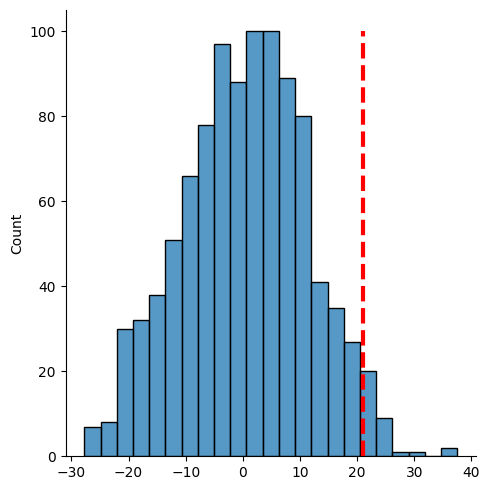

In [ ]:
diffs = []
for i in range(1000):
  c1, c2 = "Western", "Mystery"
  c1_size = temp[temp["genre"] == c1].shape[0]
  g1_sample = temp.sample(c1_size, replace=False) # replace is False by default
  g2_sample = temp[temp.index.isin(g1_sample.index) == False]
  diff = g1_sample["duration"].mean() - g2_sample["duration"].mean()
  diffs.append(diff)

sns.displot(diffs)
plt.plot([org_diff, org_diff], [0, 100], color="red", linestyle="dashed", linewidth=3)
plt.show()

In [ ]:
p_value = (np.array(diffs) >= 21.04).mean()
p_value

0.026